# Visualize Database

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
from rdkit import Chem

from ast import literal_eval

def calc_mw(smile):
    try:
        return Chem.rdMolDescriptors.CalcExactMolWt(
            Chem.MolFromSmiles(smile))
    except:
        return 0

def get_max_mw(smiles):
    smiles = literal_eval(smiles)
    if isinstance(smiles, tuple):
        mws = [calc_mw(smiles[0])]
    else:
        mws = [calc_mw(s[0]) for s in smiles]
        
    return max(mws)

# Database Analysis

In [2]:
df_db = pd.read_csv("220426_stereo_MW_prepolymer.csv")
df_db = df_db[~df_db.Tg.isna() | ~df_db.Tm.isna()]
df_db["max_mw"] = df_db.monomers.apply(get_max_mw)

## Some Numbers

In [3]:
unique_smiles = set(df_db.smiles_monomer)

print(f"Unique Things")
print(f"\tInd. Polymers:\t{len(df_db.ref)}")
print(f"\tSmiles:\t\t{len(unique_smiles)}")
print(f"\tReferences:\t{len(set(df_db.ref))}")
print("")
print(f"Mechanisms")
print(f'\tEsters:\t{sum(df_db.mechanism == "ester_stereo")}')
print(f'\tOthers:\t{sum(df_db.mechanism == "vinyl_stereo")}')

Unique Things
	Ind. Polymers:	670
	Smiles:		141
	References:	86

Mechanisms
	Esters:	339
	Others:	331


In [4]:
print(f"DataDistr")
print(f'\tEsters:')
print(f'\t\tTg: {sum((df_db.mechanism == "ester_stereo") & (~df_db.Tg.isna() & df_db.Tm.isna()))}')
print(f'\t\tTm: {sum((df_db.mechanism == "ester_stereo") & (df_db.Tg.isna() & ~df_db.Tm.isna()))}')
print(f'\t\tBoth: {sum((df_db.mechanism == "ester_stereo") & (~df_db.Tg.isna() & ~df_db.Tm.isna()))}')
print(f'\tOthers:')
print(f'\t\tTg: {sum((df_db.mechanism == "vinyl_stereo") & (~df_db.Tg.isna() & df_db.Tm.isna()))}')
print(f'\t\tTm: {sum((df_db.mechanism == "vinyl_stereo") & (df_db.Tg.isna() & ~df_db.Tm.isna()))}')
print(f'\t\tBoth: {sum((df_db.mechanism == "vinyl_stereo") & (~df_db.Tg.isna() & ~df_db.Tm.isna()))}')

DataDistr
	Esters:
		Tg: 126
		Tm: 129
		Both: 84
	Others:
		Tg: 218
		Tm: 30
		Both: 83


In [6]:
print(f"MW Distr:")
print(f"  Tg:")
print(f"    Mn:  {len(df_db[(~df_db.Mn.isna()) & (~df_db.Tg.isna())])}")
print(f"    None: {len(df_db[(df_db.Mn.isna()) & (~df_db.Tg.isna())])}")

print(f"  Tm:")
print(f"    Mn:  {len(df_db[(~df_db.Mn.isna()) & (~df_db.Tm.isna())])}")
print(f"    None: {len(df_db[(df_db.Mn.isna()) & (~df_db.Tm.isna())])}")

MW Distr:
  Tg:
    Mn:  389
    None: 122
  Tm:
    Mn:  280
    None: 46


In [7]:
print(f"MW Distr:")
print(f"Ester:")
print(f"    Mn:  {len(df_db[(~df_db.Mn.isna())  & (df_db.mechanism=='ester_stereo')])}")
print(f"    No Mn: {len(df_db[(df_db.Mn.isna()) & (df_db.mechanism=='ester_stereo')])}")

print(f"Other:")
print(f"    Mn:  {len(df_db[(~df_db.Mn.isna()) &  (df_db.mechanism=='vinyl_stereo')])}")
print(f"    No Mn: {len(df_db[(df_db.Mn.isna()) & (df_db.mechanism=='vinyl_stereo')])}")

MW Distr:
Ester:
    Mn:  283
    No Mn: 56
Other:
    Mn:  254
    No Mn: 77


In [8]:
print(f"DataDistr")
print(f'\tEsters:')
print(f'\t\tTg: {sum((df_db.mechanism == "ester_stereo") & (~df_db.Tg.isna() & df_db.Tm.isna()))}')
print(f'\t\tTm: {sum((df_db.mechanism == "ester_stereo") & (df_db.Tg.isna() & ~df_db.Tm.isna()))}')
print(f'\t\tBoth: {sum((df_db.mechanism == "ester_stereo") & (~df_db.Tg.isna() & ~df_db.Tm.isna()))}')
print(f'\tOthers:')
print(f'\t\tTg: {sum((df_db.mechanism == "vinyl_stereo") & (~df_db.Tg.isna() & df_db.Tm.isna()))}')
print(f'\t\tTm: {sum((df_db.mechanism == "vinyl_stereo") & (df_db.Tg.isna() & ~df_db.Tm.isna()))}')
print(f'\t\tBoth: {sum((df_db.mechanism == "vinyl_stereo") & (~df_db.Tg.isna() & ~df_db.Tm.isna()))}')

DataDistr
	Esters:
		Tg: 126
		Tm: 129
		Both: 84
	Others:
		Tg: 218
		Tm: 30
		Both: 83


In [9]:
# Get counts of polymers
df_counts = df_db.smiles_monomer.value_counts().rename_axis('unique_values').reset_index(name='counts').counts.value_counts().rename_axis('samples_per_polymer').reset_index(name='counts')
df_counts = df_db.smiles_monomer.value_counts().rename_axis('unique_values').reset_index(name='counts')

## Plot Histograms 

In [10]:
df_db.loc[:, "log_Mn"] = df_db.apply(lambda r: np.log10(r.Mn), axis=1)

# Pm Tg Distributions

<Figure size 1920x1440 with 0 Axes>

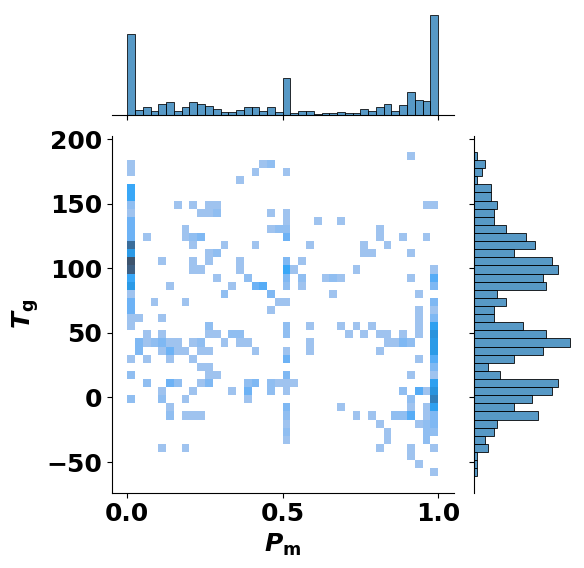

<Figure size 1920x1440 with 0 Axes>

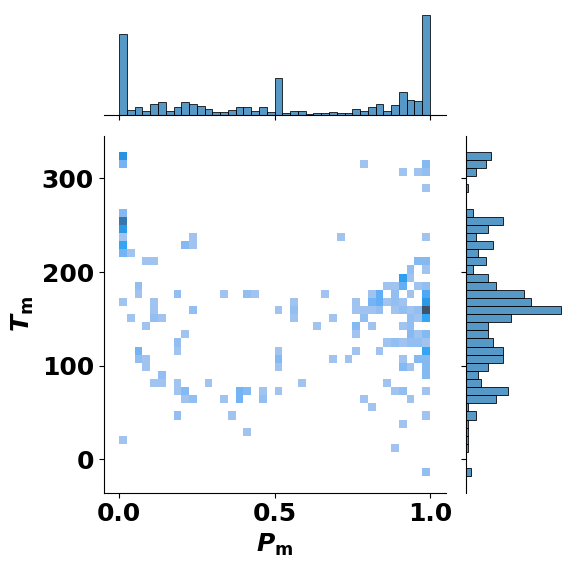

<Figure size 1920x1440 with 0 Axes>

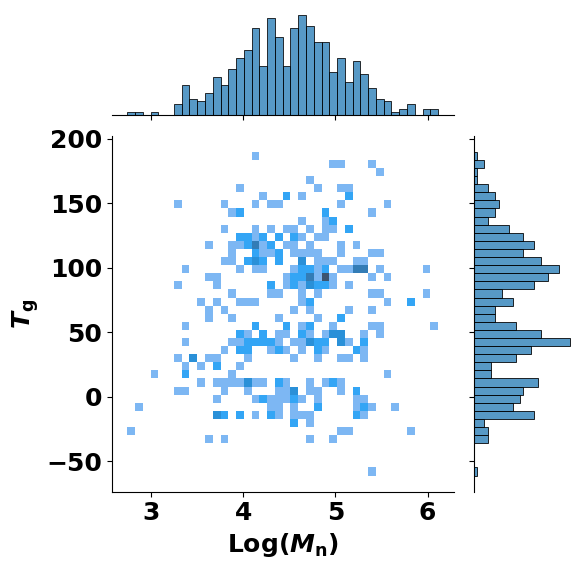

<Figure size 1920x1440 with 0 Axes>

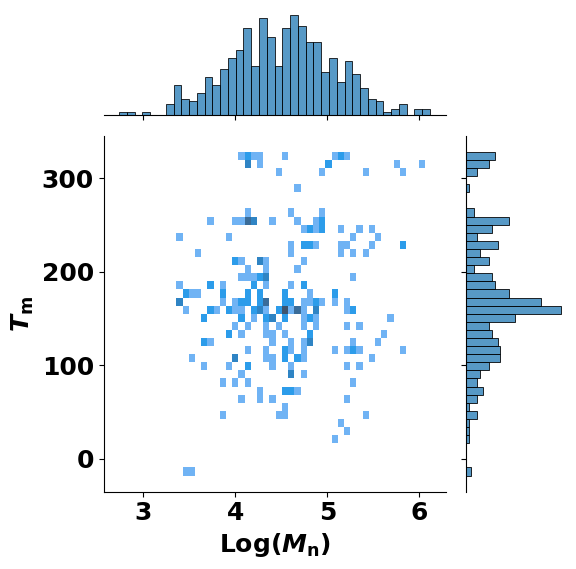

In [12]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
nbins = 40

for i in range(4):
        fig = plt.figure(dpi=300)

        if i == 0:
                g = sns.jointplot(x="pm", y="Tg", data=df_db, kind="hist",
                                marginal_kws=dict(bins=nbins),
                                joint_kws=dict(bins=nbins),
                                ratio=3, 
                        )
                g.set_axis_labels("$P_\mathrm{m}$", "$T_\mathrm{g}$")
                # g.ax_marg_y.remove()

        elif i == 1:
                g = sns.jointplot(x="pm", y="Tm", data=df_db, kind="hist",
                                marginal_kws=dict(bins=nbins),
                                joint_kws=dict(bins=nbins),
                                ratio=3, 
                        )
                g.set_axis_labels("$P_\mathrm{m}$", "$T_\mathrm{m}$")
                # g.ax_marg_x.remove()
                # g.ax_marg_y.remove()

        elif i == 2:
                g = sns.jointplot(x="log_Mn", y="Tg", data=df_db[df_db.Mn <= 2E6], kind="hist",
                                marginal_kws=dict(bins=nbins),
                                joint_kws=dict(bins=nbins),
                                ratio=3, 
                        )
                g.set_axis_labels("$\mathrm{Log(}M_\mathrm{n}\mathrm{)}$", "$T_\mathrm{g}$")

        else:
                g = sns.jointplot(x="log_Mn", y="Tm", data=df_db[df_db.Mn <= 2E6], kind="hist",
                                marginal_kws=dict(bins=nbins),
                                joint_kws=dict(bins=nbins,),
                                ratio=3, 
                        )
                g.set_axis_labels("$\mathrm{Log(}M_\mathrm{n}\mathrm{)}$", "$T_\mathrm{m}$")
                # g.ax_marg_x.remove()

        fig.tight_layout()
        plt.savefig(f"./plots/Database_plot_{i}", dpi=300)

        # g1.save_fig()
        # g2.save_fig()
        # g3.save_fig()
        # g4.save_fig()
